In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train, x_test = x_train.astype('float') / 255.0, x_test.astype('float') / 255.0

In [4]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [5]:
x_train.shape

(60000, 28, 28, 1)

In [6]:
def convModel():
    model = models.Sequential(name='Convolution')
    model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape = (28, 28, 1)))
    model.add(layers.MaxPool2D((2, 2)))
    model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(layers.MaxPool2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [7]:
model = convModel()

In [8]:
model.summary()

Model: "Convolution"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              

In [9]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1629 - accuracy: 0.9497 - val_loss: 0.0437 - val_accuracy: 0.9851
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0631 - accuracy: 0.9800 - val_loss: 0.0309 - val_accuracy: 0.9886
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0503 - accuracy: 0.9837 - val_loss: 0.0263 - val_accuracy: 0.9908
Epoch 4/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0404 - accuracy: 0.9872 - val_loss: 0.0235 - val_accuracy: 0.9925
Epoch 5/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0350 - accuracy: 0.9884 - val_loss: 0.0277 - val_accuracy: 0.9916
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0306 - accuracy: 0.9900 - val_loss: 0.0232 - val_accuracy: 0.9930
Epoch 7/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0276 - accuracy: 0.9909 - val_loss: 0.0269 - val_

In [10]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [11]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [12]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0256 - accuracy: 0.9928


[0.025649016723036766, 0.9927999973297119]

In [16]:
np.argmax(model.predict(x_train[0].reshape(1, 28, 28, 1)))

5

In [15]:
y_train[0]

5

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

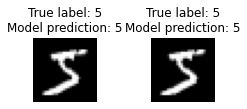

In [32]:
plt.subplot(330 + 1 + 0)
plt.title(f'True label: {y_train[0]}\nModel prediction: {np.argmax(model.predict(x_train[0].reshape(1, 28, 28, 1)))}')
plt.axis('off')
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(330 + 1 + 1)
plt.title(f'True label: {y_train[0]}\nModel prediction: {np.argmax(model.predict(x_train[0].reshape(1, 28, 28, 1)))}')
plt.axis('off')
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.show()

In [92]:
def show_wrong_predict(test_model, features, labels, indexes):
    for index in indexes:
        prediction = np.argmax(test_model.predict(features[index].reshape(1, 28, 28, 1)))
        result = labels[index]
        #plt.subplot(330 + 1 + indexes.index(index))
        plt.title(f'True label: {result}\nModel prediction: {prediction}')
        plt.axis('off')
        plt.imshow(features[index], cmap=plt.get_cmap('gray'))
        plt.show()

In [37]:
test_lst = []
for i in range(len(x_train)-55_000):
    prediction = np.argmax(model.predict(x_train[i].reshape(1, 28, 28, 1)))
    if y_train[i] != prediction:
        test_lst.append(i)
    if i % 500 == 0:
        print(i+1, 'step')

1 step
501 step
1001 step
1501 step
2001 step
2501 step
3001 step
3501 step
4001 step
4501 step


In [38]:
test_lst

[80, 494, 1404, 2426, 2764, 3532, 4476]

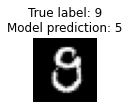

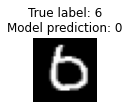

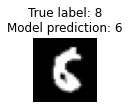

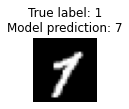

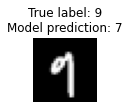

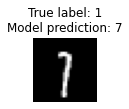

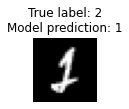

In [89]:
show_wrong_predict(model, x_train, y_train, test_lst)

In [90]:
test_lst = []
for i in range(len(x_test)):
    prediction = np.argmax(model.predict(x_test[i].reshape(1, 28, 28, 1)))
    if y_test[i] != prediction:
        test_lst.append(i)
    if i % 500 == 0:
        print(i+1, 'step')

1 step
501 step
1001 step
1501 step
2001 step
2501 step
3001 step
3501 step
4001 step
4501 step
5001 step
5501 step
6001 step
6501 step
7001 step
7501 step
8001 step
8501 step
9001 step
9501 step


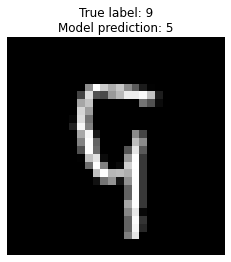

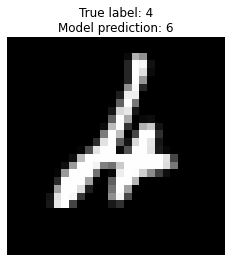

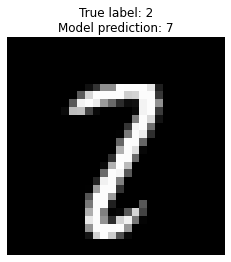

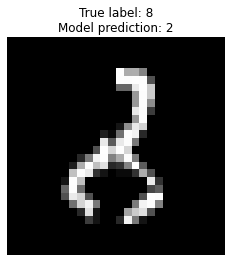

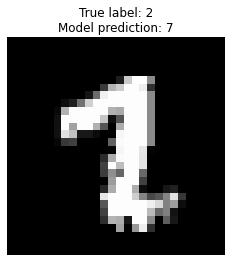

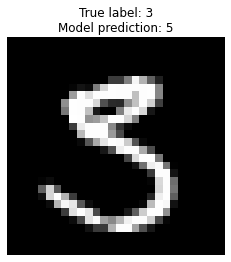

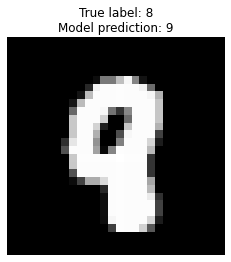

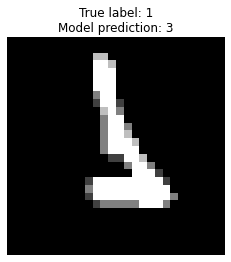

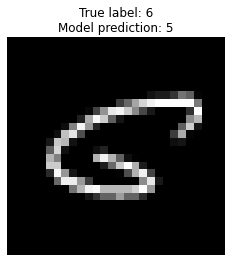

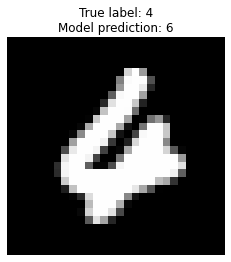

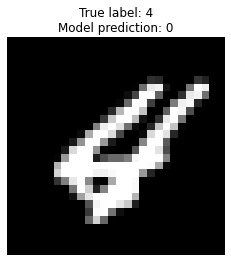

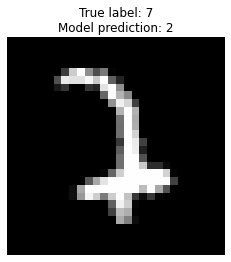

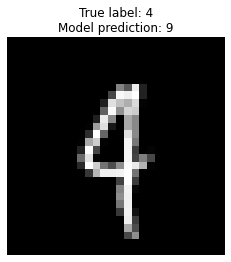

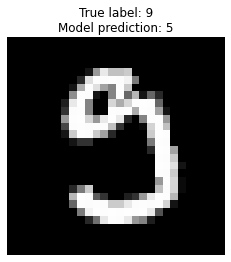

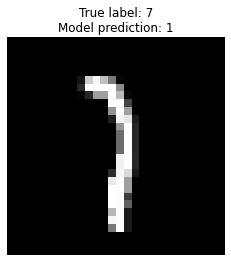

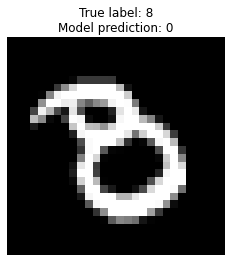

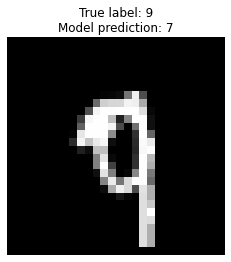

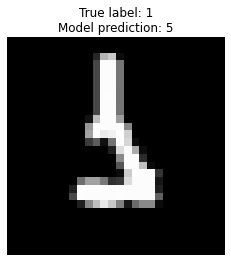

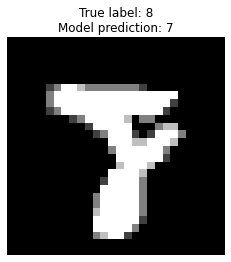

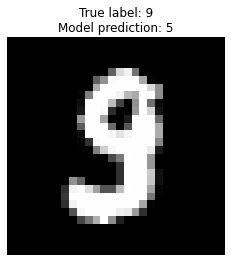

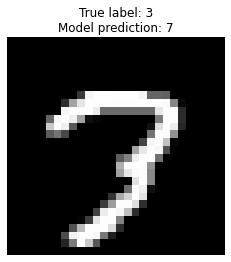

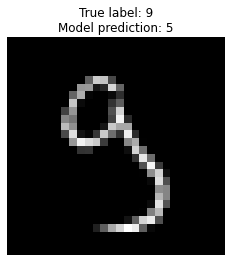

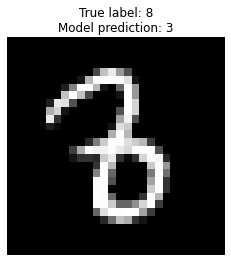

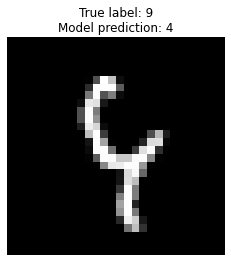

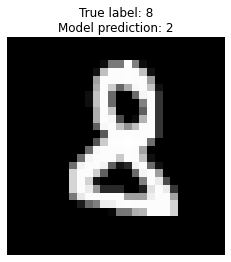

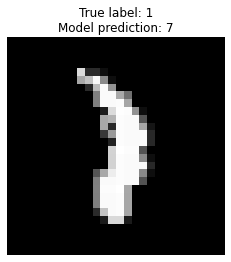

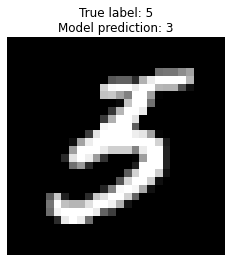

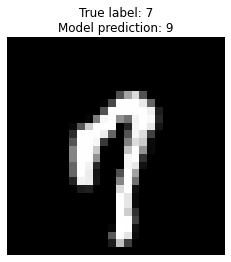

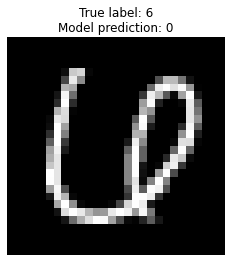

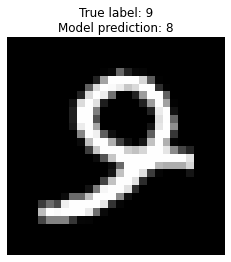

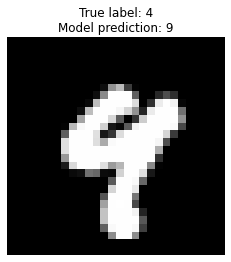

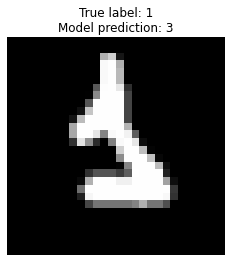

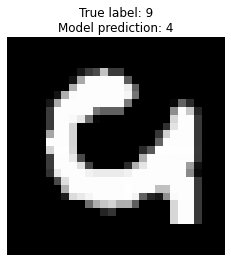

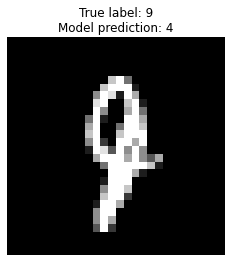

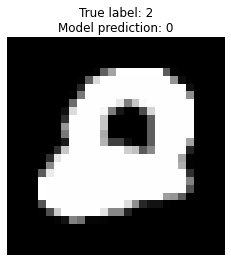

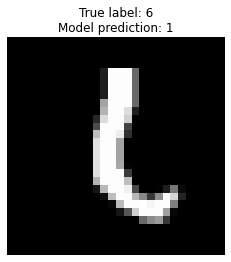

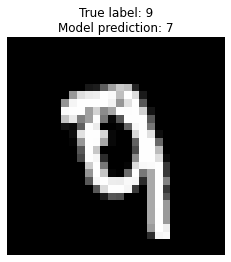

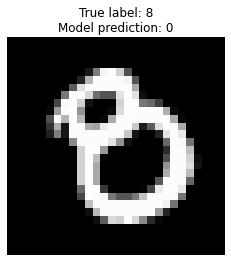

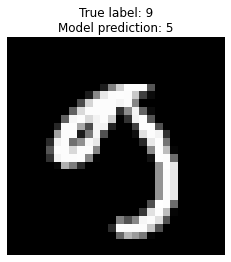

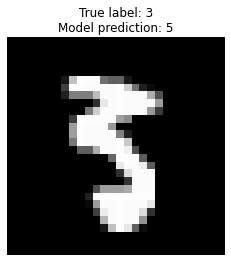

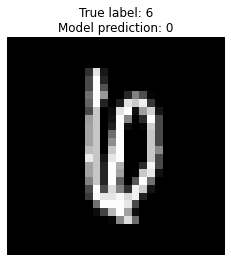

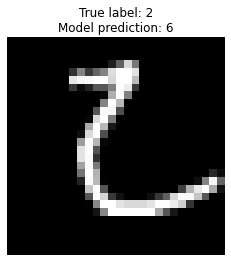

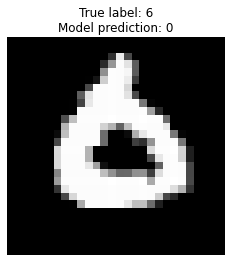

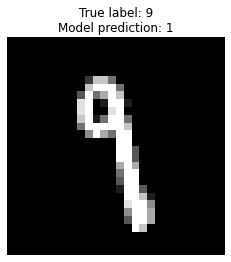

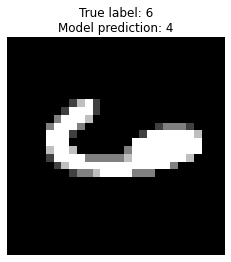

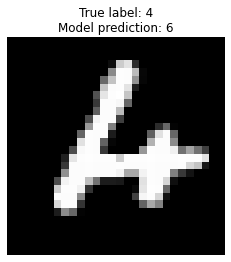

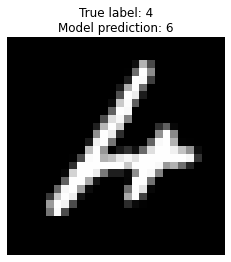

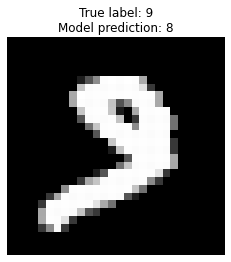

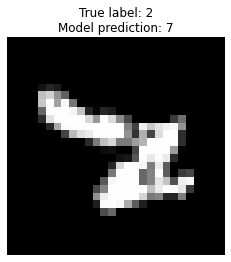

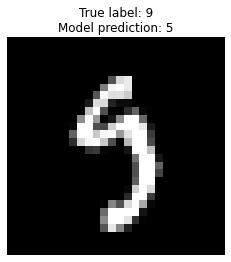

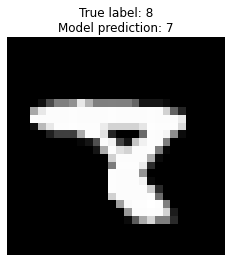

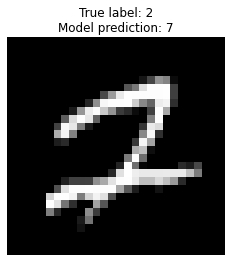

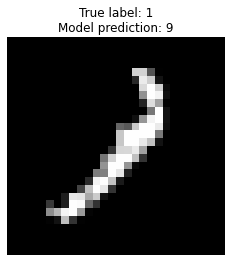

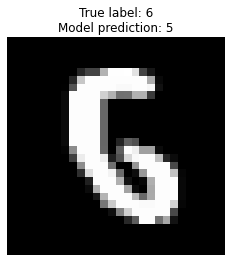

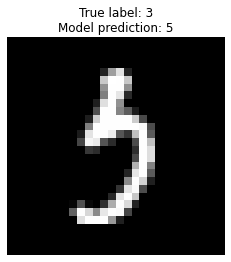

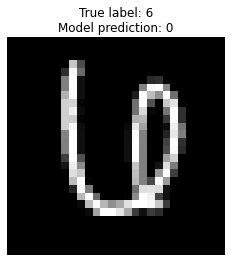

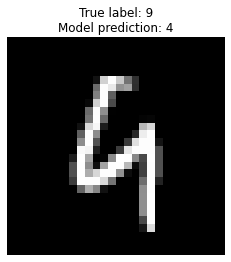

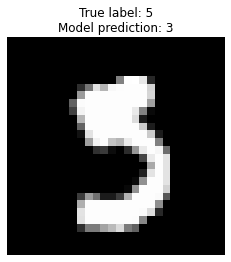

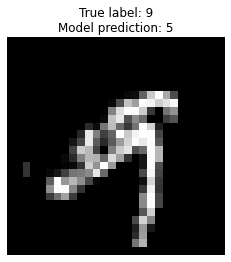

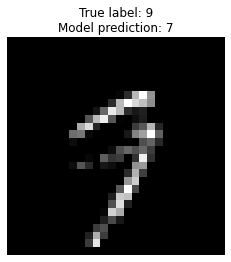

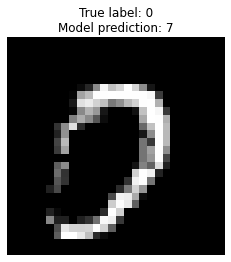

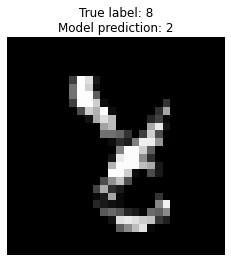

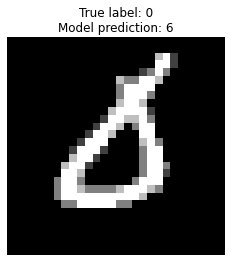

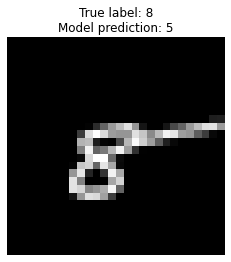

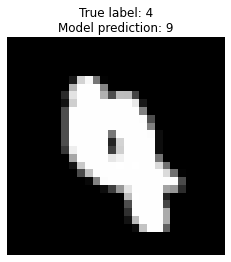

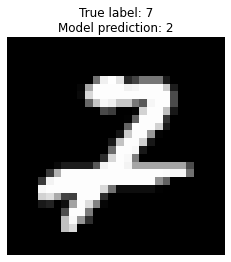

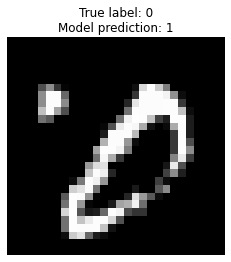

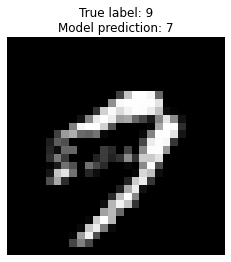

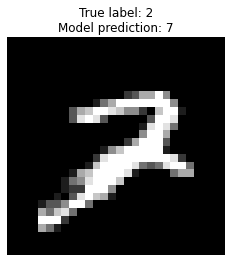

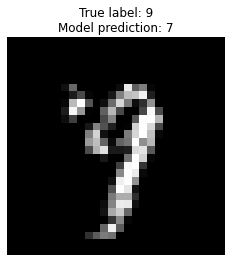

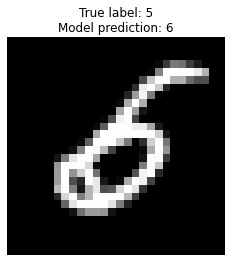

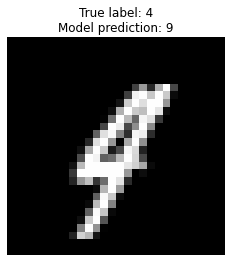

In [93]:
show_wrong_predict(model, x_test, y_test, test_lst)